<a href="https://colab.research.google.com/github/AwesomeSoftware2292/Colab-Database/blob/master/Copy_of_SSI_2020_Assignment_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment T3

*Assignment written by Naveen Durvasula, Franklyn Wang, and Adam Pahlavan*

In the following assignment, you will conduct exploratory data analysis (EDA) with bitcoin data.


## Overview

In this assignment, we'll be exploring the bitcoin starter dataset in *technology/dh-bitcoin.csv*. The bitcoin dataset contains metadata on bitcoin network traffic from 2009 to 2014. The dataset is very interesting, and there are a few peculiar quirks that we'll explore which are generalizable in nature. A few notes: 

* **Please do not worry if you know nothing about Bitcoin or blockchains.** This assignment embraces the framework of [just-in-time learning](https://en.wikipedia.org/wiki/Just-in-time_learning#:~:text=Just%2Din%2Dtime%20learning%20is,is%20needed%20by%20the%20learner.). Throughout the assignment, we will introduce the necessary information you need to know to tackle each problem before the problem is presented. 

* While understanding this dataset may still be challenging, the decision to design the assignment around such a complex dataset was purposeful. **Working with challenging datasets will prepare you to tackle far more complex datasets in the future.** As far as tabular datasets go, the Bitcoin dataset is close to as hard as it gets. After completing the assignment, you should feel confident to conquer any tabular datasets you come into contact with in the future.

* All three problems ask you to build a model which relates variables $X$ and $Y$ in the bitcoin dataset. In each case, the goal is to create a predictive model of $Y$ given $X$ for two particular columns in the dataset.

* The method we ask you to follow in problems 1-3 is generalizable and can be adapted for EDA you conduct in your own data science research projects. Performing this style of EDA whenever you start a new project is a great way to begin exploring and getting familiar with the data you are working with.

Let's get started!

## Problem 1

In this problem, we'll explore the relationship between **adjustedTxVolume (X)** and **price (Y)** in the data.



---


### **Reading: Crash Course on Bitcoin**

Before we get started, we wanted to introduce a short lesson on Bitcoin that will be useful for this problem. As you may know, Bitcoin is the first example of a [digital cryptocurrency](https://en.wikipedia.org/wiki/Cryptocurrency). The full details of how a blockchain or cryptocurrency work are pretty complex, and you will not need to know them to complete this assignment. We will explain the high-level details you should be familiar with below:

*   For the purpose of this assignment, just think of Bitcoin as any other international currency, like the European euro.
*   Just like any other international currency, there are transactions that can be measured in both the native currency denomination or in the equivalent US dollars. The exact price of a transaction in US dollars depends not only on the volume in the native demonination (i.e. 15 euros) but also the exchange rate between US dollars and the foreign currency (i.e. 1 euro = 1.12 USD). **This exchange rate fluctuates every day.**
*   One important detail worth mentioning for cryptocurrencies like Bitcoin is **there is no central backing to the currency**. The Bitcoin network is completely decentralized, and transactions are processed by the world's collective computing power. Unlike most currencies which are backed by governments, no one is really in charge of Bitcoin.
*   To give Bitcoin miners an incentive to process (or *mine*) new transactions, new Bitcoin currency is minted and given to the winner of the mining process every time a new block is mined. We will return to the mining process in Problem 3 once we discuss mining rewards.

---

### **$X$, $Y$ Column Descriptions**

This problem compares both **adjustedTxVolume (X)** and **price (Y)** in the data. We will describe both columns below:

*   **price (Y):** The USD price of Bitcoin on a particular day. Represents how many US dollars it costs to buy one Bitcoin. Here is a [website](https://www.coindesk.com/price/bitcoin) where you can track the spectacular trend in the price of Bitcoin over time.
*   **adjustedTxVolume (X):** The total economic throughput on the bitcoin network on any particular day. Let's use an example to illustrate: let's say the bitcoin network had only two participants Alice and Bob. Let's say on one day, Alice paid Bob 3 Bitcoin, and Bob paid Alice 4 Bitcoin. The TxVolume for that day would be 7 Bitcoin (and not 1 Bitcoin). The way that TxVolume is calculated is based on gross totals and not any net measure. If you are familiar with the term gross domestic product (GDP) of a country from economics, it is also calculated in a similar way. Both adjustedTxVolume and GDP are measures of how much the economy on the bitcoin network or a country is "buzzing."

**Note:** The reason why the term *adjusted* is used to describe *txVolume* is because on the Bitcoin network, there are typically a lot of transactions that are not really associated with economic transactions. These transactions are a source of noise and error when trying to track economic throughput. Possible causes for this source of noise includes factors such as:

*   **Mixers and other Privacy Enhancements:** Intermediate transactions that allow users to mix their coins with other users to obfuscate who the sender and receiver of each individual transaction is. Mixers can cause one true economic transaction to be elongated into many intermediate ones on the chain.
*   **Self-Churn:** When a user shuffles Bitcoin among her/his own addresses. This can be used to either combine or reorganize the UTXOs (term introduced in problem 2) that a user owns.

These transactions can often distort the actual economic throughput of the blockchain significantly and lead to overestimation of true economic throughput by a factor of ~10 (!). The adjusted measure of TxVolume is a way of trying to control for this source of error and to measure the true economic activity of the underlying network.

---


### **(a) Hypothesize the Relationship**
Before you plot the data on a scatterplot, what do you hypothesize the relationship between $X$ and $Y$ will be? Do you hypothesize the data will follow either a linear, power law, or exponential relationship? If not, what kind of behavior do you hypothesize the data will exhibit? Please justify your response.

I hypothesize the relationship between *X* and *Y* will exhibit an exponential relationship. The relationship between *X* and *Y* has a low chance of having a linear relationship because the total economic throughput would have to be increasing/decreasing at a constant rate the whole day. The relationship between *X* and *Y* also has a low chance of being a power law relationship because the amount of transactions per day as of July 5, 2020 is 338.767k and is continuing to increase rather than decrease.

### **(b) Load a Fresh Copy of Data**

Next, run the following cell to load the data into a *pandas* dataframe and to visualize the first five rows of data. Generally, each time you do an analysis, it's a good idea to load the data again to make sure you start with a clean copy of the dataset. If you apply a transformation to data, it's a good way of ensuring you don't have any transformations remaining when you do the next analysis. 

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# run this cell to download *dh-bitcoin.csv* from the Google Drive
df = pd.read_csv('https://drive.google.com/u/0/uc?id=1Fo_QyN4ttdz1muDHKgHtXVtZpXJ5ODoV&export=download')
df.head()

,date,txVolume,adjustedTxVolume,txCount,marketcap,price,exchangeVolume,generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue,medianFee,blockSize,blockCount
0,2013-04-28,6.879868e+07,3.153714e+07,41702,1.500656e+09,135.30,0.0,4425.0000,32.791942,117984,8.974296e+06,130171,49.980091,0.0005,21597536,177
1,2013-04-29,1.138128e+08,4.821652e+07,51602,1.491703e+09,134.44,0.0,4349.9988,45.724114,86925,8.974296e+06,112426,62.425891,0.0005,25676453,174
2,2013-04-30,8.426632e+07,5.686790e+07,47450,1.598310e+09,144.00,0.0,3725.0000,45.748651,76871,9.854414e+06,98258,26.942145,0.0005,27042465,149
3,2013-05-01,1.206825e+08,8.208736e+07,55176,1.543334e+09,139.00,0.0,3775.0000,40.885938,83564,1.007629e+07,96129,38.671980,0.0005,25727393,151
4,2013-05-02,9.337533e+07,5.823736e+07,55295,1.292577e+09,116.38,0.0,3350.0000,52.554004,81920,1.007629e+07,101721,35.382348,0.0005,26388234,134


### **(c) Plot the Data on a Scatterplot**

Visualize $X$ vs $Y$ using a scatterplot. 

*Hint: If you are unsure how to create the scatterplot, you may find the following [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) to be useful.*

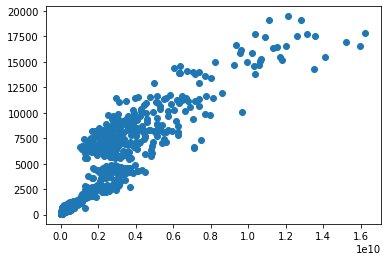

In [84]:
x = "adjustedTxVolume"
y = "price"
plt.scatter(df[x], df[y])



---
### **(d) Describe Scatterplot**

Describe, in completely qualitative terms, the direction, strength, and shape of this scatterplot. Recall the following three definitions from lecture:

**Direction:** Qualitative descriptions of variable relationships (in the simplest form: "As X increases, Y ...")

**Strength:** What is the strength of the trend you are describing?

**Shape:** What does the data look like (linear, power law, exponential? if none of the above, how would you describe what the data looks like?)

As X increases, Y increases along with it. The scatterplot starts out with numerous plots in the begining, but gets a gap once *X* reaches about 0.8. The data looks like a linear graph.



---
### **(e) Remove Outliers**
If there are any outliers, please remove them and plot the new scatterplot without outliers. Please describe how many outliers you removed and the criteria you used when determining if a point was an outlier. Note that determine if a point is an outlier is a subjective measure so there may sometimes by multiple acceptable answers for how to remove outliers.

To me it seems that there really aren't any outliers in this graph.



---

### **(f) Plot Three Transformations on Scatterplots**

We would like to answer the question of whether the data is linear or whether there is a log-transformation under which it is linear. Use a scatterplot to plot each of the following three transformations:


1.   X vs Y (linear)
3.   X vs log Y (exponential)
4.   log X vs log Y (power law)

Compare the direction, strength, and shape of each of the transformed datsets. Based on which of the three graphs has the best fit, what do you hypothesize the best regression for the relationship between $X$ and $Y$ is? In the next part, we will more rigorously answer the question of which transformation to pursue.

*Hint: To log-transform data, use np.log. Applying np.log to an array gives you an array where each element has been log-transformed.*

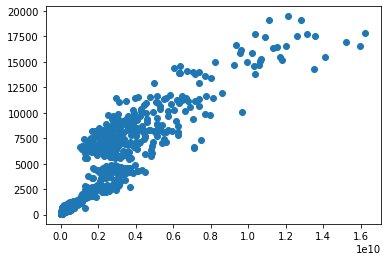

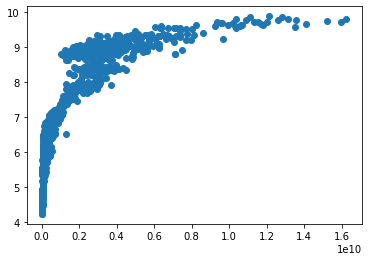

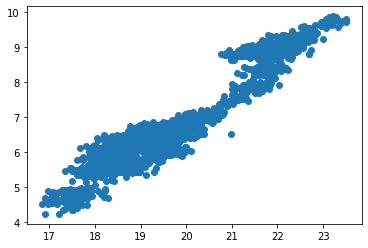

In [85]:
import numpy as np

plt.scatter(df[x], df[y])
plt.show()

plt.scatter(df[x], np.log(df[y]))
plt.show()

plt.scatter(np.log(df[x]), np.log(df[y]))
plt.show()

I hypothesize the best regression for the relationship between  X  and  Y  is a linear relationship.

---
### **(g) Choose Best Transformation**

We will now define a formal heuristic for selecting the best transformation for our regression. For each of the following transformations, calculate the value of the Pearson correlation coefficient *r* between the two variables:

1.   X vs Y (linear)
3.   X vs log Y (exponential)
4.   log X vs log Y (power law)

**Choose the transformation with the largest absolute value of *r* as the best transformation for this dataset.** We will call the coordinates associated with the transformation we choose $x'$ (either $X$ or $\log{X}$) and $y'$ (either $Y$ or $\log{Y}$) for the rest of the problem. 

**Note:** When completing this problem, please do the calculations for z-score and the correlation coefficient yourself and **do not** use functions like *scipy.stats.pearsonr* or *scipy.stats.zscore.* While using these functions is great practice for your own work, we want you to gain experience calculating these quantities manually first.

*Hints*:

*  Recall that when we have a single column of quantitative data $X$ (or $\log X$), we can take $z$-scores of the data by taking $z_{x} = \frac{X - \mu_{X}}{\sigma_{X}}$.

*   To calculate the values of the Pearson correlation coefficient $r$ between two quantitative variables $X$ and $Y$, first transform both $X$ and $Y$ to z-score space by normalizing both sets of coordinates. Then, use the following formula: 

$$ r = \frac{\sum_{i = 1}^{n} z_{x_{i}} z_{y_{i}}}{n} $$

*   You may find the np.mean() (arr.mean()) or np.log(df) functions to be useful

In [86]:
def calc_corr(a, b):
  a_std = np.std(a)
  mu_a = a.mean()
  a -= mu_a
  a /= a_std

  b_std = np.std(b)
  mu_b = b.mean()
  b -= mu_b
  b /= b_std

  return (a * b).mean()

xraw = df[x].copy()
yraw = df[x].copy()
logx = np.log(df[x])
logy = np.log(df[y])

print(calc_corr(xraw, yraw))
print(calc_corr(xraw, logy))
print(calc_corr(logx, logy))

0.9999999999999989
0.7771601812065387
0.9520469542944032


The largest absolute value of r is (0.99), which is the X vs Y transformation.

---
### **(h) Calculate Regression Coefficients**

Transform your data $x'$ and $y'$ to z-score space (i.e. calculate the z-scores $z_{y'}$ and $z_{x'}$), and write numpy code to calculate the regression coefficients $w'$ and $b'$ for $z_{y'} = w'*z_{x'} + b'$. Print out the values of $w'$ and $b'$.

*Hint: Recall that it is fairly simple to calculate $b'$ and $w'$ for a linear regression between two variables in z-score space. w' is just the correlation coefficient r between the variables, and b' is a particular constant.*

In [105]:
logx = np.log(df[x])
logy = np.log(df[x])

std_x = np.std(logx)
mu_x = logx.mean()
logx -= mu_x
logx /= std_x

std_y = np.std(logy)
mu_y = logy.mean()
logy -= mu_y
logy /= std_y

wnorm = np.mean(logx * logy)
bnorm = 0

print(wnorm)
print(bnorm)

1.0000000000000078
0




---
### **(i) Calculate Coefficient of Determination $R^2$**
Using numpy, compute the value of $R^2$ for the regression calculated in the last part. Intepret the value of $R^2$ in the context of this problem. If you did part (g) properly, you shouldn't need to do any complicated math here!

In [106]:
wnorm_sqrd = (calc_corr(xraw, yraw) **2)
print(wnorm_sqrd)

1.0000000000000004


The value of R^2 was interpreted as 1.0.

---
### **(j) Plot Residuals**
Next, plot the residuals for the regression you calculated in part (h) for the linear regression for $x'$ and $y'$ in z-score space. Explain whether the residuals graph is patterned or exhibits systematic error (see lecture 3.1 for more context).

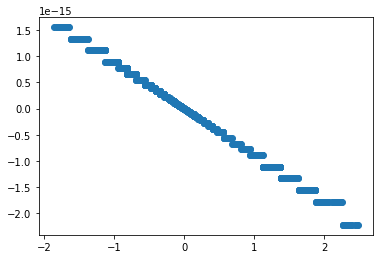

In [89]:
plt.scatter(logx, logy - (logx * wnorm + bnorm))
plt.show()

The residuals in this graph are patterned because the graph is shaped in a semi-perfect negative linear relationship.

---
### **(k) [Optional Challenge] Compute $\hat{Y}$**

So far, you have done most of your work in z-score space of transformed coordinates $x'$ and $y'$. The last thing we ask if that you go backwards and find the regression equation $\hat{Y}$. 

To go from z-score space of transformed coordinates $x'$ and $y'$ to an equation $\hat{Y}$ that predicts $y$ from $x$, you'll need to do two steps:

1.  Compute the denormalized regression coefficients $w$ and $b$ for the linear regression between $x'$ and $y'$ (not in z-score space).
2. Use the regression coefficients $w$ and $b$ to derive an equation for $\hat{Y}$.

**Finally, please plot the original data $X$ vs. $Y$ on a scatterplot along with your linear, power law, or exponential regression line for $\hat{Y}$.**

*Hints:*
* To compute the denormalized regression coefficients in step 1, recall that $w=r(\sigma_{Y} / \sigma_{X})$ and that the unnormalized regression line of best fit must always pass through the grand mean of the unnormalized points.
* Step 2 requires undoing a possibly non-linear transformation for regression $y'=wx'+b$. Recall from lecture the three types of regression:
 * X vs Y (linear) $\rightarrow$ $\hat{Y}=wX+b$
 * X vs log Y (exponential) $\rightarrow$ $\hat{Y}=e^{wX + b}$
 * log X vs log Y (power law) $\rightarrow$ $\hat{Y}=e^{b}X^{w}$

In [90]:
# write your code here

*Write your text answer here*

## Problem 2

In this problem, we'll explore the relationship between **txCount (X)** and **paymentCount (Y)** in the data.

### Reading: Bitcoin Payments and Transactions

To give background for problem 2, we want to introduce a few more details about how payments are processed on the Bitcoin blockchain network:

*   All Bitcoin on the Bitcoin network is held in entities called Unspent Transaction Outputs (UTXOs). You can think of each UTXO as having an owner and also as holding a certain quantity of Bitcoin.
*   Bitcoin on the blockchain are not directly associated with a particular user's account but rather are stored in UTXOs which are in turn owned by users. For instance, Alice's account on the blockchain would never be associated with a single Bitcoin balance but rather as the owner of a set of UTXOs.
*   A **transaction** on the Bitcoin blockchain has both inputs and output UTXOs. A transaction submitted by a user always has as its inputs UTXOs owned by the user and as its output new UTXOs that the user wants to create (which can either be owned by the sender or another party). The sum of the values of the input UTXOs must always be as least as large as the sum of the values of the output UTXOs. The difference between the input and output totals is paid as a transaction fee to the miner who successfully mines the first block with the transaction included. This transaction fee creates an incentive for miners to include many transactions in the blocks they mine.

Transactions can have one or multiple input UTXOs and one or multiple output UTXOs. The exact number depends on the use case. Here are some cases that may occur:


1.   If the goal is to transfer all the money in the input UTXOs to one person, there only needs to be one output UTXO.
2.   If the goal is to transfer some of the money in input UTXOs to one person and keep the rest for the user (this is useful in cases where you don't have the exact denomination in sum of input UTXOs for the payment you want to make), then the transaction can have two output UTXOs: a recipient-owned UTXO and a sender-owned "change" UTXO. An example of when you'd want to use something like this is if Alice only owns UTXOs of quantity 5 Bitcoin or more but wants to pay Bob 2 Bitcoin. To make a transaction, Alice would need to destroy one of her UTXOs and create two in turn: a 2 Bitcoin UTXO belonging to Bob and a "change" UTXO passing 2.9 Bitcoin back to Alice. Notice there'd be a 0.1 Bitcoin transaction fee paid to the miner who mines the block with this transaction.
3. The last case is when one sender wants to make a transaction with many output UTXOs. It is not uncommon for transactions to have over 20 output UTXOs. This kind of behavior is usually for use cases such as a mining pool paying out or a Bitcoin exchange paying its users on the chain.

---

### **$X$, $Y$ Column Descriptions**

This problem compares both **txCount (X)** and **paymentCount (Y)** in the data. We will describe both columns below:

*   **paymentCount (Y):** The number of payments processed on the blockchain on a particular day.
*   **txCount (X):** The number of transactions processed on the blockchain on a particular day.

The reason why these two numbers are different is because multiple payments can be bundled into a single transaction as explained in the notes above. Both mining pools and Bitcoin exchanges are examples where the number of payments far exceed the number of transactions.

---


### **(a) Hypothesize the Relationship**
Before you plot the data on a scatterplot, what do you hypothesize the relationship between $X$ and $Y$ will be? Do you hypothesize the data will follow either a linear, power law, or exponential relationship? If not, what kind of behavior do you hypothesize the data will exhibit? Please justify your response.

I hypothesize the relationship between  X  and  Y  will be a linear relationship because if the number of transactions increases/decreases, then so should the payment count. 

### **(b) Load a Fresh Copy of Data**

Next, run the following cell to load the data into a *pandas* dataframe and to visualize the first five rows of data. Generally, each time you do an analysis, it's a good idea to load the data again, to make sure you start with a clean copy of the dataset. If you apply a transformation to data, it's a good way of ensuring you don't have any transformations remaining when you do the next analysis. 

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# run this cell to download *dh-bitcoin.csv* from the Google Drive
df = pd.read_csv('https://drive.google.com/u/0/uc?id=1Fo_QyN4ttdz1muDHKgHtXVtZpXJ5ODoV&export=download')
df.head()

,date,txVolume,adjustedTxVolume,txCount,marketcap,price,exchangeVolume,generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue,medianFee,blockSize,blockCount
0,2013-04-28,6.879868e+07,3.153714e+07,41702,1.500656e+09,135.30,0.0,4425.0000,32.791942,117984,8.974296e+06,130171,49.980091,0.0005,21597536,177
1,2013-04-29,1.138128e+08,4.821652e+07,51602,1.491703e+09,134.44,0.0,4349.9988,45.724114,86925,8.974296e+06,112426,62.425891,0.0005,25676453,174
2,2013-04-30,8.426632e+07,5.686790e+07,47450,1.598310e+09,144.00,0.0,3725.0000,45.748651,76871,9.854414e+06,98258,26.942145,0.0005,27042465,149
3,2013-05-01,1.206825e+08,8.208736e+07,55176,1.543334e+09,139.00,0.0,3775.0000,40.885938,83564,1.007629e+07,96129,38.671980,0.0005,25727393,151
4,2013-05-02,9.337533e+07,5.823736e+07,55295,1.292577e+09,116.38,0.0,3350.0000,52.554004,81920,1.007629e+07,101721,35.382348,0.0005,26388234,134


### **(c) Plot the Data on a Scatterplot**

Visualize $X$ vs $Y$ using a scatterplot. 

*Hint: If you are unsure how to create the scatterplot, you may find the following [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) to be useful.*

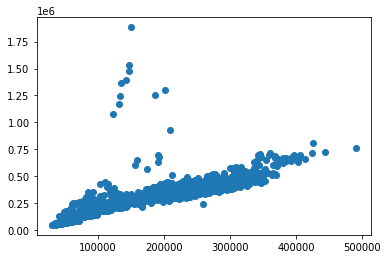

In [92]:
plt.scatter(df["txCount"], df["paymentCount"])
x = "txCount"
y = "paymentCount"



---
### **(d) Describe Scatterplot**

Describe, in completely qualitative terms, the direction, strength, and shape of this scatterplot. Recall the following three definitions from lecture:

**Direction:** Qualitative descriptions of variable relationships (in the simplest form: "As X increases, Y ...")

**Strength:** What is the strength of the trend you are describing?

**Shape:** What does the data look like (linear, power law, exponential? if none of the above, how would you describe what the data looks like?)

As the X increases the Y increases along with it. The scatter plot has a strong positive linear correlation.



---
### **(e) Remove Outliers**
If there are any outliers, please remove them and plot the new scatterplot without outliers. Please describe how many outliers you removed and the criteria you used when determining if a point was an outlier. Note that determine if a point is an outlier is a subjective measure so there may sometimes by multiple acceptable answers for how to remove outliers.

      txCount  paymentCount
793    155724        602736
799    173889        568309
800    190613        700081
801    201586       1301391
802    191030        630204
803    192866        677969
804    186052       1257353
805    208550        927889
806    159547        647251
822    143048       1391580
823    123443       1078991
824    147352       1473022
825    147326       1537131
828    132411       1171795
829    133625       1241824
830    134695       1365143
857    149906       1883744
1015   212014        512296
1447   290069        529245
1448   270555        505855
1650   277479        516545
1701   279371        503880
1708   290259        515996
1720   299913        575458
1723   273473        514589


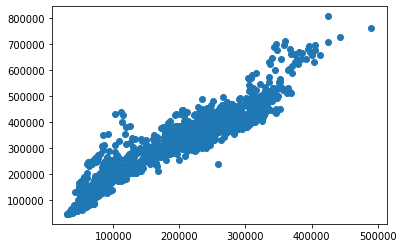

In [93]:
print(df[(df[x] <= 300000) & (df[y] >= 500000)][[x,y]])

df = df[(df[x] > 300000) | (df[y] < 500000)]
plt.scatter(df[x], df[y])


The outliers were the ones that had high y-values when the x-values were low, making them not fit in with the rest of the plots.



---

### **(f) Plot Three Transformations on Scatterplots**

We would like to answer the question of whether the data is linear or whether there is a log-transformation under which it is linear. Use a scatterplot to plot each of the following three transformations:


1.   X vs Y (linear)
3.   X vs log Y (exponential)
4.   log X vs log Y (power law)

Compare the direction, strength, and shape of each of the transformed datsets. Based on which of the three graphs has the best fit, what do you hypothesize the best regression for the relationship between $X$ and $Y$ is? In the next part, we will more rigorously answer the question of which transformation to pursue.

*Hint: To log-transform data, use np.log. Applying np.log to an array gives you an array where each element has been log-transformed.*

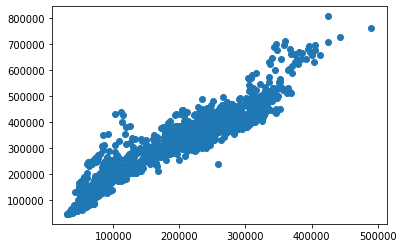

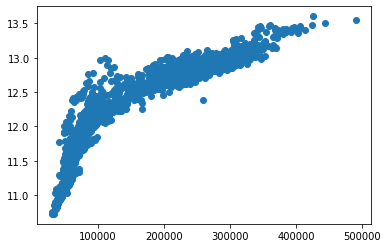

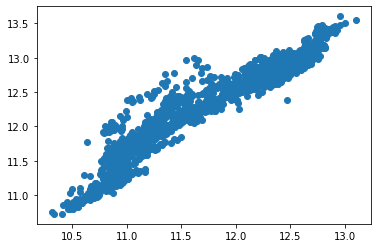

In [94]:
import numpy as np

plt.scatter(df[x], df[y])
plt.show()

plt.scatter(df[x], np.log(df[y]))
plt.show()

plt.scatter(np.log(df[x]), np.log(df[y]))
plt.show()

Based on these graphs, I hypothesize that the best regression for X and Y will be 1.

---
### **(g) Choose Best Transformation**

We will now define a formal heuristic for selecting the best transformation for our regression. For each of the following transformations, calculate the value of the Pearson correlation coefficient *r* between the two variables:

1.   X vs Y (linear)
3.   X vs log Y (exponential)
4.   log X vs log Y (power law)

**Choose the transformation with the largest absolute value of *r* as the best transformation for this dataset.** We will call the coordinates associated with the transformation we choose $x'$ (either $X$ or $\log{X}$) and $y'$ (either $Y$ or $\log{Y}$) for the rest of the problem. 

**Note:** When completing this problem, please do the calculations for z-score and the correlation coefficient yourself and **do not** use functions like *scipy.stats.pearsonr* or *scipy.stats.zscore.* While using these functions is great practice for your own work, we want you to gain experience calculating these quantities manually first.

*Hints*:

*  Recall that when we have a single column of quantitative data $X$ (or $\log X$), we can take $z$-scores of the data by taking $z_{x} = \frac{X - \mu_{X}}{\sigma_{X}}$.

*   To calculate the values of the Pearson correlation coefficient $r$ between two quantitative variables $X$ and $Y$, first transform both $X$ and $Y$ to z-score space by normalizing both sets of coordinates. Then, use the following formula: 

$$ r = \frac{\sum_{i = 1}^{n} z_{x_{i}} z_{y_{i}}}{n} $$

*   You may find the np.mean() (arr.mean()) or np.log(df) functions to be useful

In [95]:
def calc_corr(a, b):
  a_std = np.std(a)
  mu_a = a.mean()
  a -= mu_a
  a /= a_std

  b_std = np.std(b)
  mu_b = b.mean()
  b -= mu_b
  b /= b_std

  return (a * b).mean()

xraw = df[x].copy()
yraw = df[x].copy()
logx = np.log(df[x])
logy = np.log(df[y])

print(calc_corr(xraw, yraw))
print(calc_corr(xraw, logy))
print(calc_corr(logx, logy))

1.0000000000000044
0.9020317153654905
0.9545949919372424



The one with the largest absoulte value r is the linear transformation, making it the best 

---
### **(h) Calculate Regression Coefficients**

Transform your data $x'$ and $y'$ to z-score space (i.e. calculate the z-scores $z_{y'}$ and $z_{x'}$), and write numpy code to calculate the regression coefficients $w'$ and $b'$ for $z_{y'} = w'*z_{x'} + b'$. Print out the values of $w'$ and $b'$.

*Hint: Recall that it is fairly simple to calculate $b'$ and $w'$ for a linear regression between two variables in z-score space. w' is just the correlation coefficient r between the variables, and b' is a particular constant.*

In [96]:
logx = np.log(df[x])
logy = np.log(df[x])

std_x = np.std(logx)
mu_x = logx.mean()
logx -= mu_x
logx /= std_x

std_y = np.std(logy)
mu_y = logy.mean()
logy -= mu_y
logy /= std_y

wnorm = np.mean(logx * logy)
bnorm = 0

print(wnorm)
print(bnorm)

1.0
0





---
### **(i) Calculate Coefficient of Determination $R^2$**
Using numpy, compute the value of $R^2$ for the regression calculated in the last part. Intepret the value of $R^2$ in the context of this problem. If you did part (g) properly, you shouldn't need to do any complicated math here!

In [107]:
wnorm_sqrd = (calc_corr(xraw, yraw) **2)
print(wnorm_sqrd)

1.0000000000000004


The value of R^2 was interpreted as 1.0.

---
### **(j) Plot Residuals**
Next, plot the residuals for the regression you calculated in part (h) for the linear regression for $x'$ and $y'$ in z-score space. Explain whether the residuals graph is patterned or exhibits systematic error (see lecture 3.1 for more context).

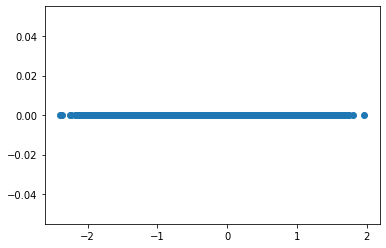

In [98]:
plt.scatter(logx, logy - (logx * wnorm + bnorm))
plt.show()

The residuals graph is patterned because it showcases a pretty much perfect linear relationsip.

---
### **(k) [Optional Challenge] Compute $\hat{Y}$**

So far, you have done most of your work in z-score space of transformed coordinates $x'$ and $y'$. The last thing we ask if that you go backwards and find the regression equation $\hat{Y}$. 

To go from z-score space of transformed coordinates $x'$ and $y'$ to an equation $\hat{Y}$ that predicts $y$ from $x$, you'll need to do two steps:

1.  Compute the denormalized regression coefficients $w$ and $b$ for the linear regression between $x'$ and $y'$ (not in z-score space).
2. Use the regression coefficients $w$ and $b$ to derive an equation for $\hat{Y}$.

**Finally, please plot the original data $X$ vs. $Y$ on a scatterplot along with your linear, power law, or exponential regression line for $\hat{Y}$.**

*Hints:*
* To compute the denormalized regression coefficients in step 1, recall that $w=r(\sigma_{Y} / \sigma_{X})$ and that the unnormalized regression line of best fit must always pass through the grand mean of the unnormalized points.
* Step 2 requires undoing a possibly non-linear transformation for regression $y'=wx'+b$. Recall from lecture the three types of regression:
 * X vs Y (linear) $\rightarrow$ $\hat{Y}=wX+b$
 * X vs log Y (exponential) $\rightarrow$ $\hat{Y}=e^{wX + b}$
 * log X vs log Y (power law) $\rightarrow$ $\hat{Y}=e^{b}X^{w}$

In [99]:
# write your code here

*Write your text answer here*

## Problem 3 

In this problem, we'll explore the relationship between **generatedCoins (X)** and **blockCount (Y)** in the data. 

### Reading: Bitcoin Mining and Block Rewards

As mentioned earlier, the Bitcoin network is entirely decentralized and maintained by the world's collective computing power. The way the system works is whenever a participant on the blockchain wants to send a payment on the network, she/he can broadcast the transaction to all miners on the network. The miners can thus choose which transactions to include in the blocks they mine. To incentivize miners to include a transaction, participants in the network can include a transaction fee paid to in their transaction as a reward for including the block.

In addition to transaction fees, Bitcoin incentivizes mining through the minting of new coins. Every time a block is mined, a new quantity of Bitcoin is "minted" and awarded to the winner of the mining process. The amount of money rewarded for each block is called the block reward.

Aside: The way the Bitcoin blockchain network incentivizes mining is interesting

---

### **$X$, $Y$ Column Descriptions**

This problem compares both **generatedCoins (X)** and **blockCount (Y)** in the data. We will describe both columns below:

*   **blockCount (Y):** The number of blocks that were mined on a particular day.
*   **generatedCoins (X):** The amount of Bitcoin minted on a particular day as block rewards.

---


### **(a) Hypothesize the Relationship**
Before you plot the data on a scatterplot, what do you hypothesize the relationship between $X$ and $Y$ will be? Do you hypothesize the data will follow either a linear, power law, or exponential relationship? If not, what kind of behavior do you hypothesize the data will exhibit?

*Hint: We omitted in the description above one important detail about the mining process that is necessary to answer this question. If you can identify what that hint is, please describe it here.*

I believe it will be a exponential relationship because X is a constant and won't change according to Y.

### **(b) Load a Fresh Copy of Data**

Next, run the following cell to load the data into a *pandas* dataframe and to visualize the first five rows of data. Generally, each time you do an analysis, it's a good idea to load the data again, to make sure you start with a clean copy of the dataset. If you apply a transformation to data, it's a good way of ensuring you don't have any transformations remaining when you do the next analysis. 

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# run this cell to download *dh-bitcoin.csv* from the Google Drive
df = pd.read_csv('https://drive.google.com/u/0/uc?id=1Fo_QyN4ttdz1muDHKgHtXVtZpXJ5ODoV&export=download')
df.head()

,date,txVolume,adjustedTxVolume,txCount,marketcap,price,exchangeVolume,generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue,medianFee,blockSize,blockCount
0,2013-04-28,6.879868e+07,3.153714e+07,41702,1.500656e+09,135.30,0.0,4425.0000,32.791942,117984,8.974296e+06,130171,49.980091,0.0005,21597536,177
1,2013-04-29,1.138128e+08,4.821652e+07,51602,1.491703e+09,134.44,0.0,4349.9988,45.724114,86925,8.974296e+06,112426,62.425891,0.0005,25676453,174
2,2013-04-30,8.426632e+07,5.686790e+07,47450,1.598310e+09,144.00,0.0,3725.0000,45.748651,76871,9.854414e+06,98258,26.942145,0.0005,27042465,149
3,2013-05-01,1.206825e+08,8.208736e+07,55176,1.543334e+09,139.00,0.0,3775.0000,40.885938,83564,1.007629e+07,96129,38.671980,0.0005,25727393,151
4,2013-05-02,9.337533e+07,5.823736e+07,55295,1.292577e+09,116.38,0.0,3350.0000,52.554004,81920,1.007629e+07,101721,35.382348,0.0005,26388234,134


### **(c) Plot the Data on a Scatterplot**

Visualize $X$ vs $Y$ using a scatterplot. 

*Hint: If you are unsure how to create the scatterplot, you may find the following [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) to be useful.*

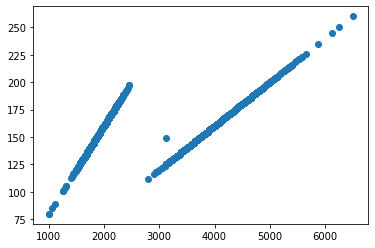

In [101]:
x = "generatedCoins"
y = "blockCount"
plt.scatter(df[x], df[y])



---
### **(d) Describe Scatterplot**

Describe, in completely qualitative terms, the direction, strength, and shape of this scatterplot. Recall the following three definitions from lecture:

**Direction:** Qualitative descriptions of variable relationships (in the simplest form: "As X increases, Y ...")

**Strength:** What is the strength of the trend you are describing?

**Shape:** What does the data look like (linear, power law, exponential? if none of the above, how would you describe what the data looks like?)

This is a positive weird-looking graph with an okay strength and is shaped like two seperate linear graphs.



---


**Clearly, the dataset does not at all resemble a linear, exponential, or power law relationship, so we should confidently abandon that form of modeling entirely! The rest of this problem is optional and is concerned with figuring out exactly what explains the "strangeness" in this dataset.**

### **(e) [Optional Challenge] Uncover the Mystery**
The scatterplot shows that the data seems to fall on two separate lines. Let's see if we can try to uncover more information about this strange pattern. To get started, use Pandas to separate the dataframe into two separate dataframes corresponding to points on each of the two lines. What do you notice as a general property of points in these two dataframes?

*Hint 1: It may be helpful to look at the date column of the data.*

*Hint 2: It's hard to look at three dimensions at once on a 2-D graph. One way to make it easier is to visualize the third dimension with color. The following code uses Seaborn, a commonly used extension of matplotlib:*

```
import seaborn as sns
g = sns.scatterplot(x = <fill this in>, y=<fill this in>, data=df, hue=<fill this in>)
g.legend_.remove()
```
*will show a graph where x and y are as usual, and one can use an extra variable to represent the color of each datapoint. Lastly, if you want to see the legend of the data (how the colors correspond to the points) feel free to comment out the last line.*



In [102]:
# write your code here

*Write your answer here.*

---
### **(f) [Optional Challenge] Find Out Why**
If you got the correct answer to part (e), then you will realize that we have indeed identified a very interesting property of the dataset. There is actually a very specific reason for this pattern and it has to do with an important property of the Bitcoin network. Please describe why we observe this interesting pattern.

As a challenge problem for this assignment, we ask you to read the [Bitcoin network wikipedia page](https://en.wikipedia.org/wiki/Bitcoin_network) to see if you can find the answer.

*Hint 1: It may help to first consider why both segments of the scatterplot are perfect lines. In other words, what does the slope of the line represent in this case, and why is the value constant?*

*Hint 2: You may find the [Bitcoin network wikipedia page](https://en.wikipedia.org/wiki/Bitcoin_network) to be a useful resource to read. You can focus your reading on the parts of the page before the start of the Payment Verifiication section.*


*Write your answer here.*

## Next Steps

**If you've made it to this part of the assignment, congrats!** T3 was certainly a challenging assignment in terms of both technical content and also understanding the complexities of an extremely dense field of technology. Working with this particularly challenging dataset should've allowed you to:

*   **Get practice working with real, complicated data.** Real world data is often tricky and nuanced, and the skills you developed here should hopefully generalize to understanding datasets in other scientific domains with complexities.
*   **Get experience with blockchain technologies.** Blockchain technologies are one of the fastest-moving fields in science right now, and the field looks almost entirely different today than it does even two years ago (almost no other field can claim this!). Much of the advancements in blockchain technologies are actually driven by advanced methods in cryptography and theoretical computer science. It is probably the field with the most applications of theoretical concepts to a real-world problem.

To learn more about the cryptography or technology behind blockchains and cryptocurrencies, we recommend checking out the following courses:

*   CS 255: [Introduction to Cryptography](https://crypto.stanford.edu/~dabo/cs255/) 
*   CS 251: [Cryptocurrencies and Blockchain Technologies](https://cs251.stanford.edu/)
*  CS 355: [Topics in Cryptography](https://crypto.stanford.edu/cs355/20sp/)

If you're interested and have any questions, please reach out to Adam or Franklyn on Slack.
